In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import exp,log
%matplotlib inline

In [2]:
path = 'D:\Courses\Fall 19\ELEG 815 Statistical Learning\HW6\Dataset'
data_original = pd.read_csv(path+'\Weekly.csv',header=None)
#data.iloc[1:,9]

In [3]:
labels = data_original.iloc[1:,9]
labels = labels.astype('category')
y_n = [0]*(len(labels)+1)
for i in range(len(labels)):
    #print(labels.iloc[i])
    if labels.iloc[i] == 'Down':
        y_n[i+1] = -1
    else:
        y_n[i+1] = 1
data = data_original.drop(0,0)
data = data.iloc[:,1:9]
data.head()

,1,2,3,4,5,6,7,8
1,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.27
2,1990,-0.27,0.816,1.572,-3.936,-0.229,0.148574,-2.576
3,1990,-2.576,-0.27,0.816,1.572,-3.936,0.1598375,3.514
4,1990,3.514,-2.576,-0.27,0.816,1.572,0.16163,0.712
5,1990,0.712,3.514,-2.576,-0.27,0.816,0.153728,1.178


# (a) Correlation Matrix, Conclusions and Patterns

In [4]:
data = data.astype('float32')
corr = data.corr()
corr

,1,2,3,4,5,6,7,8
1,1.000000,-0.032289,-0.033390,-0.030006,-0.031128,-0.030519,0.841942,-0.032460
2,-0.032289,1.000000,-0.074853,0.058636,-0.071274,-0.008183,-0.064951,-0.075032
3,-0.033390,-0.074853,1.000000,-0.075721,0.058382,-0.072499,-0.085513,0.059167
4,-0.030006,0.058636,-0.075721,1.000000,-0.075396,0.060657,-0.069288,-0.071244
5,-0.031128,-0.071274,0.058382,-0.075396,1.000000,-0.075675,-0.061075,-0.007826
6,-0.030519,-0.008183,-0.072499,0.060657,-0.075675,1.000000,-0.058517,0.011013
7,0.841942,-0.064951,-0.085513,-0.069288,-0.061075,-0.058517,1.000000,-0.033078
8,-0.032460,-0.075032,0.059167,-0.071244,-0.007826,0.011013,-0.033078,1.000000


Text(0.5,1,'Volume vs Time')

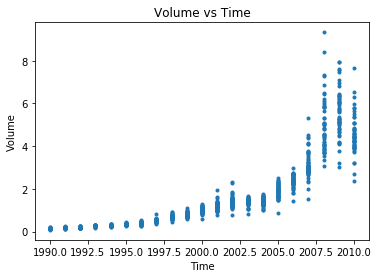

In [5]:
plt.scatter(data.iloc[:,0],data.iloc[:,6],marker='.')
plt.xlabel('Time')
plt.ylabel('Volume')
plt.title('Volume vs Time')

Volume is the number of shares traded on the previous week in Billions of USD. We observe that as volumne increases significantly in later years mostly after 2005 and rises to a sharp peak and then drops a little bit. There is no recurring pattern which can be observed in the given data.

# (b) Fit Logisitic Regression Model

Lag2 variable seems significant predictor since it has positive weight and rest have negative weights. It can also be seen in part (e) where when we use Lag2 as the only predictor, we see that our fraction of correct predictions increases, hence proving the point.

In [6]:
"""-------------------------- Data Preprocessing -------------------------------"""
data_log_regression = data.iloc[:,1:7]
data_X0_column = pd.DataFrame(columns=['Constant'])
data_X0_column['Constant'] = [1 for i in range(len(data_log_regression)+1)]
data_X0_column = data_X0_column.drop([0],axis=0)
data_log_regression = pd.concat([data_X0_column,data_log_regression],axis=1)
data_log_regression.head()

,Constant,2,3,4,5,6,7
1,1,0.816,1.572,-3.936,-0.229,-3.484,0.154976
2,1,-0.270,0.816,1.572,-3.936,-0.229,0.148574
3,1,-2.576,-0.270,0.816,1.572,-3.936,0.159837
4,1,3.514,-2.576,-0.270,0.816,1.572,0.161630
5,1,0.712,3.514,-2.576,-0.270,0.816,0.153728


In [7]:
def Logistic_Regression(data_log_regression,y_n,learning_rate,iterations):
    np.random.seed(101)
    y_n = list(y_n)
    W = np.random.random((data_log_regression.shape[1],))
    N = len(data_log_regression)
    lr = learning_rate
    print('Initial Weights :',W)
    E_in_w = []
    print('Generating Logistic Regression Model ...')
    for t in range(iterations):
        total_gradient = 0
        total_error = 0
        for index,x_n in data_log_regression.iterrows():
            """------------------ Gradient -----------------------"""
            total_gradient += (y_n[index]*x_n)/(1 + np.exp(y_n[index]*np.dot(W.T,x_n)))
            """------------- Cross Entropy Error -----------------"""
            total_error += np.log(1 + np.exp(-y_n[index]*np.dot(W.T,x_n)))
        gradient = -(1/N)*total_gradient         # Divide by total examples
        v_t = - gradient
        E_in_w.append(total_error/N)
        W += lr*v_t
    return W,E_in_w


In [8]:
W, E_in_w = Logistic_Regression(data_log_regression,y_n,0.01,1000)
print('Final Weights :',np.array(W))

Initial Weights : [0.51639863 0.57066759 0.02847423 0.17152166 0.68527698 0.83389686
 0.30696622]
Generating Logistic Regression Model ...
Final Weights : [ 0.28398615 -0.0418899   0.05777502 -0.01662507 -0.02838606 -0.01500763
 -0.02831387]


[ 0.28398615 -0.0418899   0.05777502 -0.01662507 -0.02838606 -0.01500763
 -0.02831387]


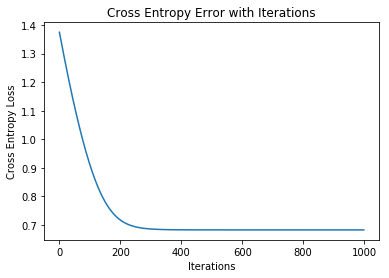

In [9]:
plt.plot(E_in_w)
plt.xlabel('Iterations')
plt.ylabel('Cross Entropy Loss')
plt.title('Cross Entropy Error with Iterations')
print(np.array(W))

# (c) probability output g(x) for the first 10 data points of training set

In [10]:
def Prob_Output_10_Points(W,data):
    data = data.iloc[:10]
    Err = []
    for index,x_n in data.iterrows():
        signal = np.dot(W.T,x_n)
        sigmoid = 1/(1 + np.exp(-signal))
        Err.append(sigmoid)
    return Err
Err = Prob_Output_10_Points(W,data_log_regression)
print(Err)

[0.6131236815929944, 0.6052201030992954, 0.5920993371607856, 0.485282743445567, 0.6203592901997176, 0.572034520119827, 0.5823179733494286, 0.5186502031631058, 0.5752984051645059, 0.5592043070113407]


Probability for first 10 data points is 

[0.6131236815929944, 0.6052201030992954, 0.5920993371607856, 0.485282743445567, 0.6203592901997176, 0.572034520119827, 0.5823179733494286, 0.5186502031631058, 0.5752984051645059, 0.5592043070113407]

# (d) Fraction of correct predictions : 0.5105601469237833

In [11]:
def Fraction_Correct_Classification(W,data,labels):
    down = []
    up = []
    for index,x_n in data.iterrows():
        signal = np.dot(W.T,x_n)
        sigmoid = 1/(1 + np.exp(-signal))
        if sigmoid >= 0.5 and labels[index] == 1:
                up.append(sigmoid)
    return len(up)/len(data)
print('Fraction of correct predictions :',Fraction_Correct_Classification(W,data_log_regression,y_n))

Fraction of correct predictions : 0.5105601469237833


# (e)  Fraction of Correct Predictions = 0.5480769230769231
#Weight Vector = [0.230562 ,  0.057415]

In [12]:
def Filter_Data_By_Year_Range(data,start,end):
    labels_train = pd.DataFrame()
    labels_test = pd.DataFrame()
    data = data.reset_index(drop=True)
    col1 = data.iloc[:,1].astype(float)
    col2 = data.iloc[:,3].astype(float)
    df = pd.concat([col1,col2],axis=1,ignore_index=True)
    df = df.reset_index(drop=True)
    year_list = [i for i in range(start,end+1)]
    train_df = pd.DataFrame()
    test_df = pd.DataFrame()
    for index,x_n in df.iterrows():
        if int(x_n[0]) in year_list:
            train_df = train_df.append(pd.DataFrame([x_n[1]]),ignore_index=True)
            if str(data.iloc[index][9]) == 'Down':
                labels_train = labels_train.append(pd.DataFrame([-1]),ignore_index=True)
            else:
                labels_train = labels_train.append(pd.DataFrame([1]),ignore_index=True)
        else:
            test_df = test_df.append(pd.DataFrame([x_n[1]]),ignore_index=True)
            if str(data.iloc[index][9]) == 'Down':
                labels_test = labels_test.append(pd.DataFrame([-1]),ignore_index=True)
            else:
                labels_test = labels_test.append(pd.DataFrame([1]),ignore_index=True)
    col_x0_train = pd.DataFrame()
    col_x0_test = pd.DataFrame()
    col_x0_train['Constant'] = [1 for i in range(len(train_df))]
    col_x0_test['Constant'] = [1 for i in range(len(test_df))]
    final_train_df = pd.concat([col_x0_train,train_df],axis=1)
    final_test_df = pd.concat([col_x0_test,test_df],axis=1)
    return final_train_df,final_test_df,labels_train,labels_test
data_to_filter = data_original.drop(0,0)    
data_2_d_train,data_2_d_test,labels_train_2d,labels_test_2d = Filter_Data_By_Year_Range(data_to_filter,1990,2008)
print(labels_train_2d.shape)

(985, 1)


In [13]:
labels_train_2d = labels_train_2d[0].values.tolist()

In [14]:
W_2_d, E_in_w_2_d = Logistic_Regression(data_2_d_train,labels_train_2d,0.01,1000)
print('Final Weights :',W_2_d)

Initial Weights : [0.51639863 0.57066759]
Generating Logistic Regression Model ...
Final Weights : Constant    0.230562
0           0.057415
Name: 0, dtype: float64


Text(0.5,1,'Cross Entropy Error with Iterations')

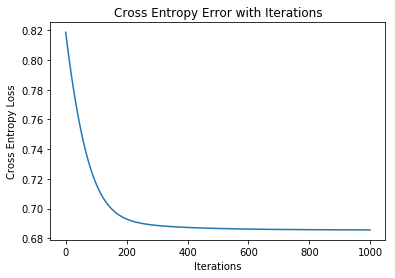

In [15]:
plt.plot(E_in_w_2_d)
plt.xlabel('Iterations')
plt.ylabel('Cross Entropy Loss')
plt.title('Cross Entropy Error with Iterations')

In [16]:
def Fraction_Correct_Classification_2d(W,data,labels):
    up = []
    for index,x_n in data.iterrows():
        signal = np.dot(W.T,x_n)
        sigmoid = 1/(1 + np.exp(-signal))
        if sigmoid >= 0.5 and int(labels.iloc[index]) == 1:
                up.append(sigmoid)
    return len(up)/len(data)
print('Fraction of correct predictions using Lag2 as predictor :',Fraction_Correct_Classification_2d(W_2_d,data_2_d_test,labels_test_2d))

Fraction of correct predictions using Lag2 as predictor : 0.5480769230769231
